MOVIE RECOMMENDATION SYSTEM

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from  wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Data set is imported from kaggle which contains 105339 ratings and 10329 movies.

Data Set has 2 files movies.csv and rating.csv

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


From the Mean of the ratings Dataset We Can Conclude that:
-> The avearage rating is 3.5
-> Minimum rating is 0.5
-> Maximum rating is 5

In [11]:
# this code is trying to extract the list of genres from a dataset of movies and also 
# create a list of movie titles without the year information 
# (assuming the year is always the last 7 characters of the title).

genres=[]
for genre in movies.genres:
    x = genre.split('|')
    for i in x:
        if i not in genres:
            genres.append(str(i))
            
genres_str = str(genres)    
movie_title = []
for title in movies.title:
    movie_title.append(title[0:-7])
    
movie_title_str = str(movie_title)

DATA VISUALIZATION

In [15]:
genre_visual=WordCloud(width=1500,height=800,background_color='grey',min_font_size=2,min_word_length=3).generate(genres_str)

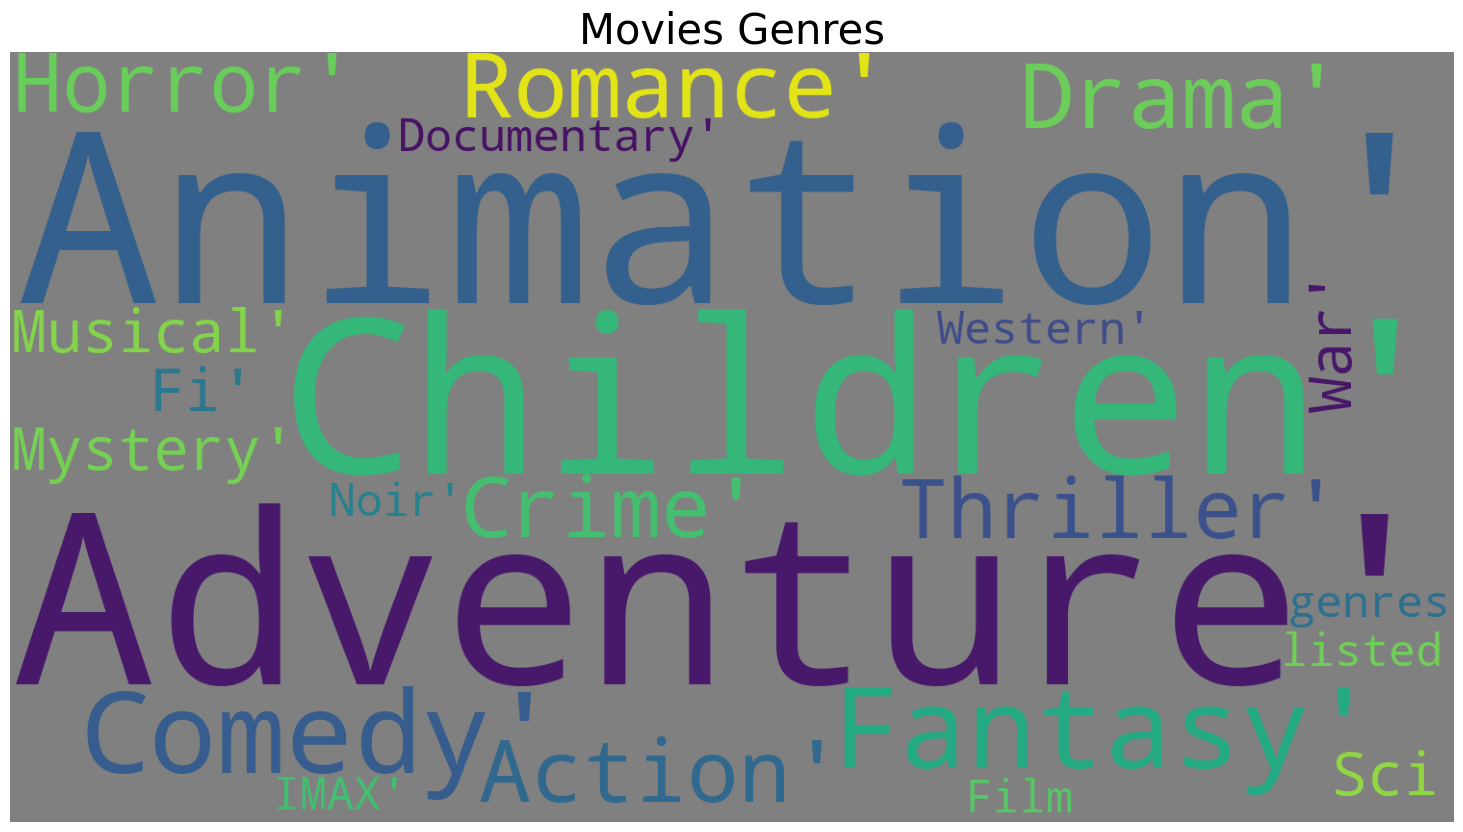

In [16]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('Movies Genres',fontsize=30)
plt.imshow(genre_visual)


In [17]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [18]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1404.0
Forrest Gump (1994),1370.0
Pulp Fiction (1994),1288.5
"Matrix, The (1999)",1165.5
"Silence of the Lambs, The (1991)",1161.0


<BarContainer object of 20 artists>

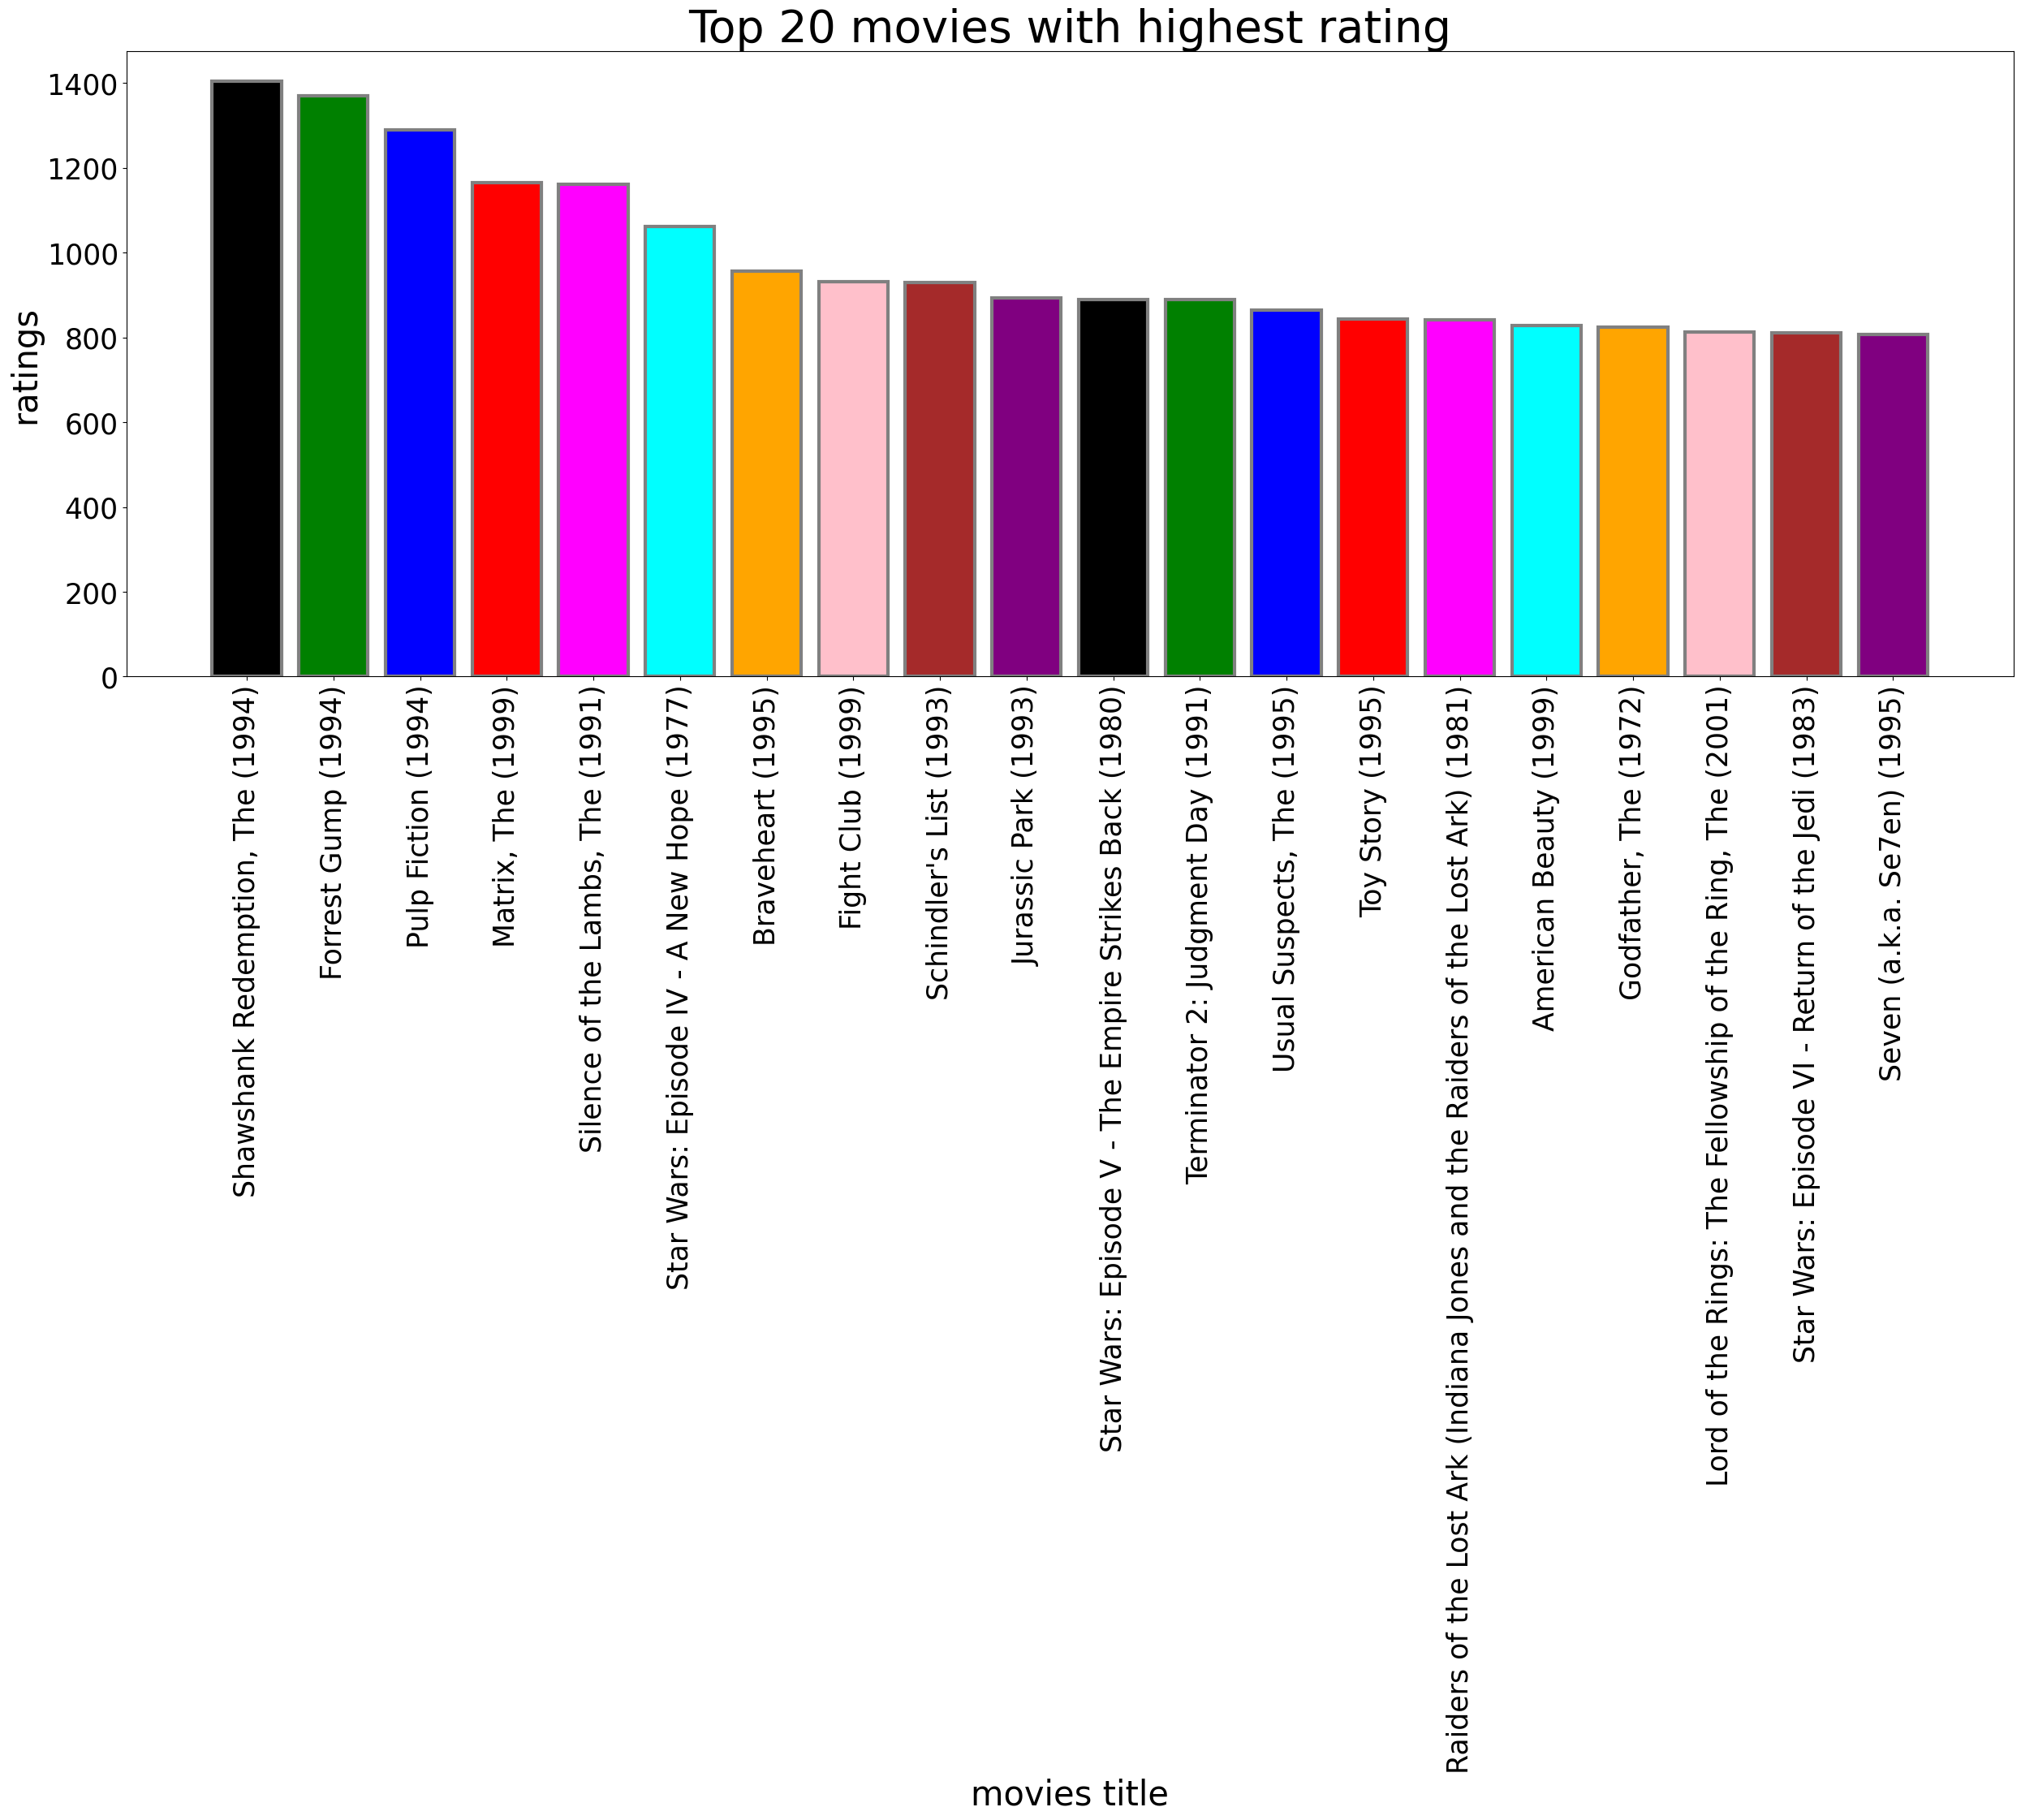

In [19]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['black','green','blue','red','magenta','cyan','orange','pink','brown','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='grey',color=colors)


In [20]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [21]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
indices = pd.Series(movies.index, index=movies['title'])
movie_titles = movies['title']

def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return movie_titles.iloc[movie_indices]


Suppose a user wants to watch a movie similar to Fight Club (1999) then we can recommend the user by calculating the cosine similarity between fight club and other movies.

In [27]:
recommendations('Fight Club (1999)')

254     Léon: The Professional (a.k.a. The Professiona...
307                       Clear and Present Danger (1994)
758                              Last Man Standing (1996)
919             Killer, The (Die xue shuang xiong) (1989)
1181                                      Face/Off (1997)
1192                                      Cop Land (1997)
1915                                Corruptor, The (1999)
2165                               Double Jeopardy (1999)
2226                                    Fight Club (1999)
2443                                 Patriot Games (1992)
2452                Hard-Boiled (Lat sau san taam) (1992)
2462                          Boondock Saints, The (2000)
2744                                  Magnum Force (1973)
2788                                         Shaft (1971)
2814                           Blood In, Blood Out (1993)
2943                                    Get Carter (1971)
3578                                      Spy Game (2001)
4242          